Here, we will be evaluating the model qualitatively.

In [39]:
import numpy as np
import nibabel as nib
import os
import glob

def npy_to_nii(npy_path, output_path=None, is_x=True, voxel_spacing=(1.0, 1.0, 1.0)):
    """
    Convert a .npy file to a NIfTI .nii file.

    Args:
        npy_path:       Path to the input .npy file.
        output_path:    Path for the output .nii file. If None, saves next to the input.
        affine:         4x4 affine matrix. If None, uses a diagonal matrix from voxel_spacing.
        voxel_spacing:  (x, y, z) voxel size in mm. Used when affine is None.
    """
    # Load the numpy array
    affine=None
    data = np.load(npy_path).astype(np.float32)
    if is_x:
        data = data[:, :, :, 2]
    else:
        data = np.argmax(data, axis=-1)
    print(data.shape)
    print(f"Loaded: {npy_path}  |  shape: {data.shape}  |  dtype: {data.dtype}")

    # Ensure it's 3D
    if data.ndim != 3:
        raise ValueError(f"Expected a 3D array, but got shape {data.shape}. "
                         "If your array is (C, H, W, D), select the channel you want first.")

    if data.dtype == np.int64:
        # Use int16 for label/segmentation masks (values typically 0–255)
        # Use float32 for image intensities (CT HU values, MRI signal, etc.)
        if data.min() >= -32768 and data.max() <= 32767:
            data = data.astype(np.int16)
            print(f"  Cast int64 → int16  (range: {data.min()} to {data.max()})")
        else:
            data = data.astype(np.float32)
            print(f"  Cast int64 → float32 (range was outside int16 bounds)")
    elif data.dtype == np.float64:
        data = data.astype(np.float32)
        print(f"  Cast float64 → float32")
    if affine is None:
        sx, sy, sz = voxel_spacing
        affine = np.diag([sx, sy, sz, 1.0])  # simple diagonal affine (no rotation/offset)

    # Create NIfTI image
    nii_img = nib.Nifti1Image(data, affine)

    # Set voxel dimensions in the header explicitly
    nii_img.header.set_zooms(voxel_spacing)

    # Determine output path
    if output_path is None:
        base = os.path.splitext(npy_path)[0]
        output_path = base + ".nii"

    nib.save(nii_img, output_path)
    print(f"Saved:  {output_path}\n")
    return output_path

In [37]:
npy_to_nii("data/BraTS2020_npy/data/10/combined_scan.npy", is_x=True)
npy_to_nii("data/BraTS2020_npy/data/10/mask.npy", is_x=False)

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/10/combined_scan.npy  |  shape: (128, 128, 128)  |  dtype: float32
Saved:  data/BraTS2020_npy/data/10/combined_scan.nii

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/10/mask.npy  |  shape: (128, 128, 128)  |  dtype: int64
  Cast int64 → int16  (range: 0 to 3)
Saved:  data/BraTS2020_npy/data/10/mask.nii



'data/BraTS2020_npy/data/10/mask.nii'

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/11/combined_scan.npy  |  shape: (128, 128, 128)  |  dtype: float32
Saved:  data/BraTS2020_npy/data/11/combined_scan.nii

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/11/mask.npy  |  shape: (128, 128, 128)  |  dtype: int64
  Cast int64 → int16  (range: 0 to 3)
Saved:  data/BraTS2020_npy/data/11/mask.nii



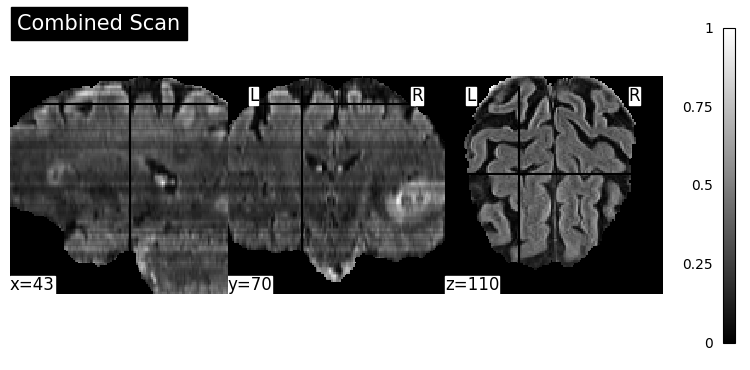

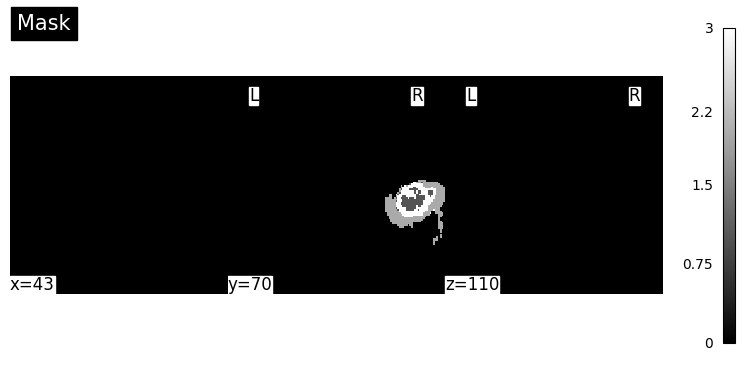

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/21/combined_scan.npy  |  shape: (128, 128, 128)  |  dtype: float32
Saved:  data/BraTS2020_npy/data/21/combined_scan.nii

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/21/mask.npy  |  shape: (128, 128, 128)  |  dtype: int64
  Cast int64 → int16  (range: 0 to 3)
Saved:  data/BraTS2020_npy/data/21/mask.nii



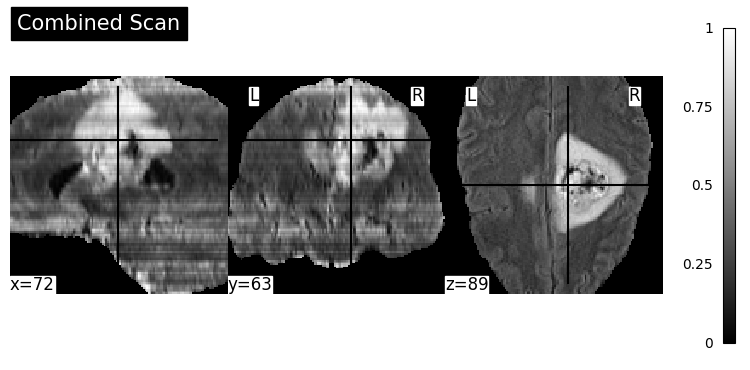

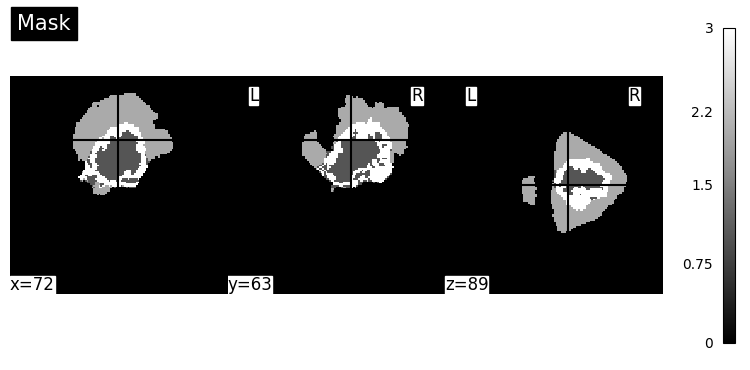

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/31/combined_scan.npy  |  shape: (128, 128, 128)  |  dtype: float32
Saved:  data/BraTS2020_npy/data/31/combined_scan.nii

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/31/mask.npy  |  shape: (128, 128, 128)  |  dtype: int64
  Cast int64 → int16  (range: 0 to 3)
Saved:  data/BraTS2020_npy/data/31/mask.nii



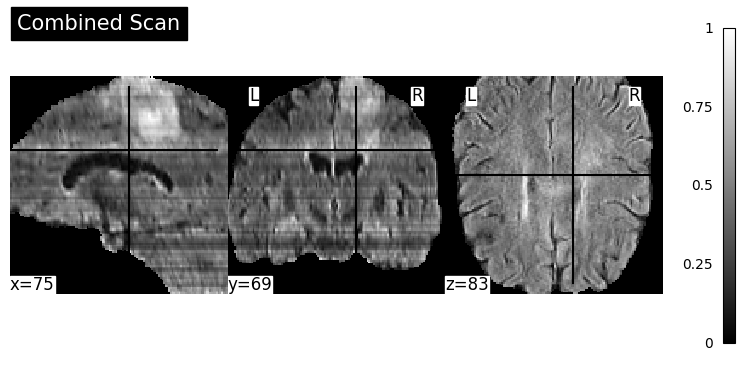

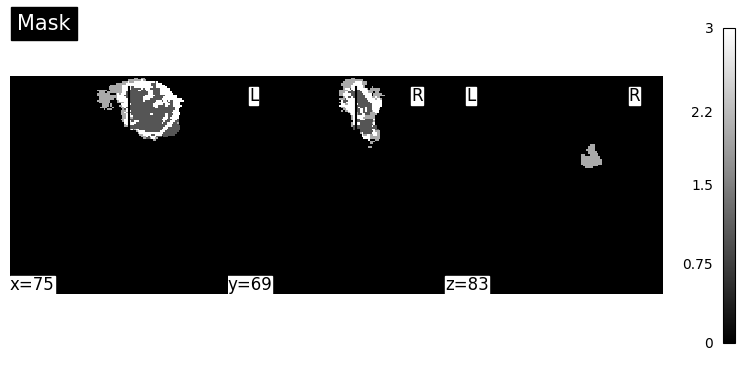

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/41/combined_scan.npy  |  shape: (128, 128, 128)  |  dtype: float32
Saved:  data/BraTS2020_npy/data/41/combined_scan.nii

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/41/mask.npy  |  shape: (128, 128, 128)  |  dtype: int64
  Cast int64 → int16  (range: 0 to 3)
Saved:  data/BraTS2020_npy/data/41/mask.nii



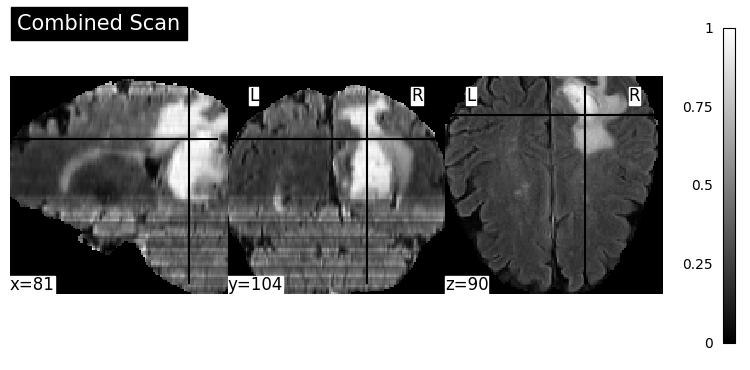

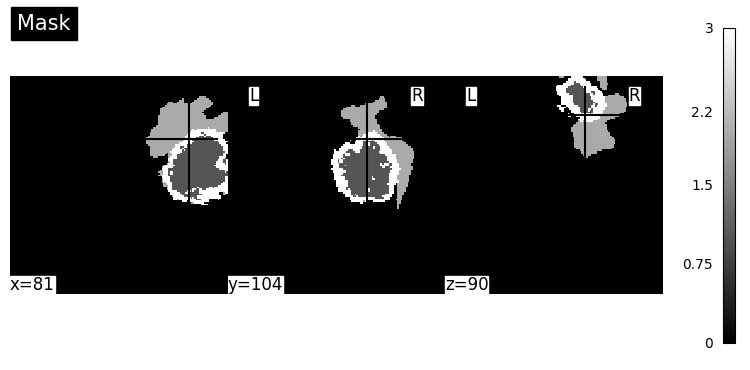

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/51/combined_scan.npy  |  shape: (128, 128, 128)  |  dtype: float32
Saved:  data/BraTS2020_npy/data/51/combined_scan.nii

(128, 128, 128)
Loaded: data/BraTS2020_npy/data/51/mask.npy  |  shape: (128, 128, 128)  |  dtype: int64
  Cast int64 → int16  (range: 0 to 3)
Saved:  data/BraTS2020_npy/data/51/mask.nii



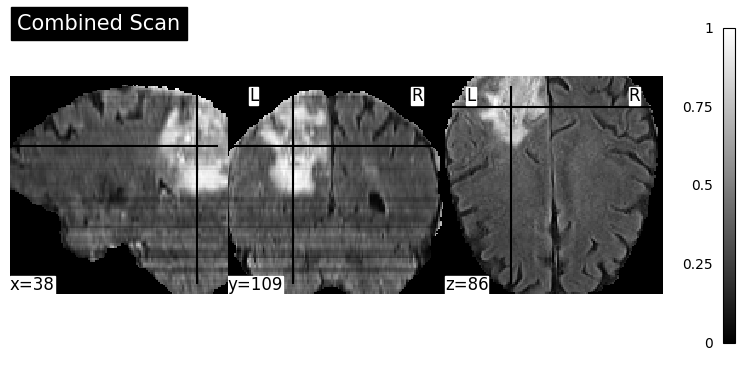

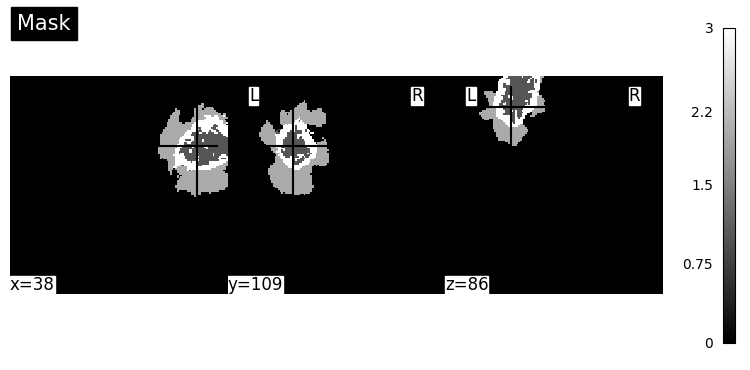

In [ ]:
from nilearn import plotting, image
from typing import Optional

def visualise_scan_abspath(
    data_path: Optional[str],
    title: str = "3D Scan",
    cut_coords: Optional[tuple] = None,
    display_mode: str = "ortho",
) -> tuple:
    
    if cut_coords is None:
        # Let nilearn find the centre-of-mass / peak voxel automatically
        cut_coords = plotting.find_cut_slices(image.load_img(data_path), n_cuts=1)
        # find_cut_slices returns an array; for 'ortho' we need a single (x,y,z)
        img = image.load_img(data_path)
        cut_coords = plotting.find_xyz_cut_coords(img)

    plotting.plot_img(
        img=data_path,
        title=title,
        cut_coords=cut_coords,
        display_mode=display_mode,
    )
    plotting.show()
    return cut_coords

for i in range(5):
    idx = 11 + i*10
    npy_to_nii(f"data/BraTS2020_npy/data/{idx}/combined_scan.npy", is_x=True)
    npy_to_nii(f"data/BraTS2020_npy/data/{idx}/mask.npy", is_x=False)
    scan_path = rf"data\BraTS2020_npy\data\{idx}\combined_scan.nii"
    mask_path  = rf"data\BraTS2020_npy\data\{idx}\mask.nii"

# First call: coords are chosen automatically from the scan
    coords = visualise_scan_abspath(scan_path, title="Combined Scan")

# Second call: reuse the exact same coords for the mask
    visualise_scan_abspath(mask_path, title="Mask", cut_coords=coords)

In [42]:
import torch
from models.UNet.unet import UNet
from models.UNet.params import UNetParams

params = UNetParams()
model = UNet(params=params)
PATH = "unet3d_combined_loss.pth"
state_dict = torch.load(PATH)
model.load_state_dict(state_dict)

x = np.load("data/BraTS2020_npy/data/10/combined_scan.npy")

RuntimeError: Error(s) in loading state_dict for UNet:
	Unexpected key(s) in state_dict: "down_conv1.batch_norm1.weight", "down_conv1.batch_norm1.bias", "down_conv1.batch_norm2.weight", "down_conv1.batch_norm2.bias", "down_conv2.batch_norm1.weight", "down_conv2.batch_norm1.bias", "down_conv2.batch_norm2.weight", "down_conv2.batch_norm2.bias", "down_conv3.batch_norm1.weight", "down_conv3.batch_norm1.bias", "down_conv3.batch_norm2.weight", "down_conv3.batch_norm2.bias", "down_conv4.batch_norm1.weight", "down_conv4.batch_norm1.bias", "down_conv4.batch_norm2.weight", "down_conv4.batch_norm2.bias", "bottlenck.batch_norm1.weight", "bottlenck.batch_norm1.bias", "bottlenck.batch_norm2.weight", "bottlenck.batch_norm2.bias", "up_conv1.batchnorm.weight", "up_conv1.batchnorm.bias", "up_conv1.batchnorm.running_mean", "up_conv1.batchnorm.running_var", "up_conv1.batchnorm.num_batches_tracked", "up_conv1.conv3d_block.batch_norm1.weight", "up_conv1.conv3d_block.batch_norm1.bias", "up_conv1.conv3d_block.batch_norm2.weight", "up_conv1.conv3d_block.batch_norm2.bias", "up_conv2.batchnorm.weight", "up_conv2.batchnorm.bias", "up_conv2.batchnorm.running_mean", "up_conv2.batchnorm.running_var", "up_conv2.batchnorm.num_batches_tracked", "up_conv2.conv3d_block.batch_norm1.weight", "up_conv2.conv3d_block.batch_norm1.bias", "up_conv2.conv3d_block.batch_norm2.weight", "up_conv2.conv3d_block.batch_norm2.bias", "up_conv3.batchnorm.weight", "up_conv3.batchnorm.bias", "up_conv3.batchnorm.running_mean", "up_conv3.batchnorm.running_var", "up_conv3.batchnorm.num_batches_tracked", "up_conv3.conv3d_block.batch_norm1.weight", "up_conv3.conv3d_block.batch_norm1.bias", "up_conv3.conv3d_block.batch_norm2.weight", "up_conv3.conv3d_block.batch_norm2.bias", "up_conv4.batchnorm.weight", "up_conv4.batchnorm.bias", "up_conv4.batchnorm.running_mean", "up_conv4.batchnorm.running_var", "up_conv4.batchnorm.num_batches_tracked", "up_conv4.conv3d_block.batch_norm1.weight", "up_conv4.conv3d_block.batch_norm1.bias", "up_conv4.conv3d_block.batch_norm2.weight", "up_conv4.conv3d_block.batch_norm2.bias". 